In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers, regularizers
from matplotlib import pyplot
import json

2024-03-26 18:57:57.796774: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 18:57:57.800674: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-26 18:57:57.851172: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-26 18:57:59.060677: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)
word_idx = imdb.get_word_index()

In [3]:
def vectorize(word_list, size=10_000):
  result = np.zeros(size)
  for i in word_list:
    assert(i < size)
    result[i] = 1
  return result

In [4]:
X_train = np.array([vectorize(row) for row in train_data])
X_test = np.array([vectorize(row) for row in test_data])
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [6]:
for i in range(20):
  print(X_train[i][:20])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.]
[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
[0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
[0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]
[0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
[0. 1. 1

In [7]:
X_valid = X_train[:10_000]
X_train_partial = X_train[10_000:]
y_valid = y_train[:10_000]
y_train_partial = y_train[10_000:]

In [8]:
def execute_model(model, epochs=10):
  model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )
  history = model.fit(
    X_train_partial,
    y_train_partial,
    epochs=epochs,
    batch_size=512,
    validation_data=(X_valid, y_valid),
    verbose=False
  )
  loss_values = history.history['loss']
  valid_loss_values = history.history['val_loss']
  epoch = range(len(loss_values))
  print(json.dumps(history.history, indent=4))
  pyplot.plot(epoch, loss_values, '-')
  pyplot.plot(epoch, valid_loss_values, '--')

2024-03-26 18:58:09.553005: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


{
    "accuracy": [
        0.7861999869346619,
        0.8848000168800354,
        0.9038000106811523,
        0.9174666404724121,
        0.9242666959762573,
        0.9301333427429199,
        0.9368666410446167,
        0.9404000043869019,
        0.9439333081245422,
        0.9487333297729492
    ],
    "loss": [
        0.5475100874900818,
        0.39518168568611145,
        0.33091500401496887,
        0.29281389713287354,
        0.2696714699268341,
        0.2540188133716583,
        0.24127821624279022,
        0.23262789845466614,
        0.22620855271816254,
        0.21849820017814636
    ],
    "val_accuracy": [
        0.8289999961853027,
        0.8741000294685364,
        0.8777999877929688,
        0.8866000175476074,
        0.887499988079071,
        0.8877000212669373,
        0.885200023651123,
        0.8867999911308289,
        0.8859000205993652,
        0.8848999738693237
    ],
    "val_loss": [
        0.46892744302749634,
        0.3856831192970276,
      

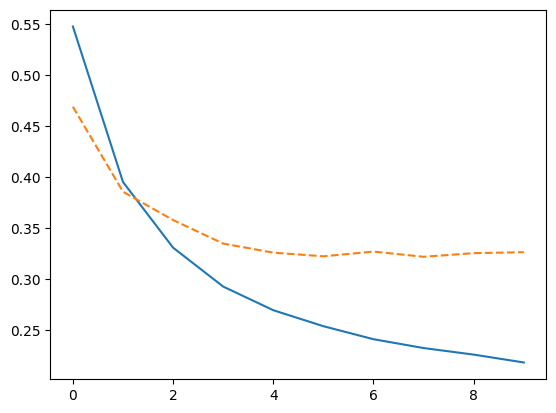

In [9]:
model = models.Sequential()
model.add(layers.Input((10_000,)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))
execute_model(model)

2024-03-26 18:58:15.166093: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


{
    "accuracy": [
        0.6478666663169861,
        0.7564666867256165,
        0.7880666851997375,
        0.8100000023841858,
        0.8213333487510681,
        0.8267999887466431,
        0.8448666930198669,
        0.8442000150680542,
        0.8485333323478699,
        0.8521333336830139
    ],
    "loss": [
        0.6284304261207581,
        0.5282019376754761,
        0.4752119183540344,
        0.44515174627304077,
        0.4208412170410156,
        0.4060308039188385,
        0.3857773244380951,
        0.37778377532958984,
        0.36816903948783875,
        0.36461833119392395
    ],
    "val_accuracy": [
        0.8342000246047974,
        0.86080002784729,
        0.8709999918937683,
        0.8776000142097473,
        0.8816999793052673,
        0.8837000131607056,
        0.8866000175476074,
        0.8847000002861023,
        0.8876000046730042,
        0.8873000144958496
    ],
    "val_loss": [
        0.5189536213874817,
        0.44866007566452026,
        0

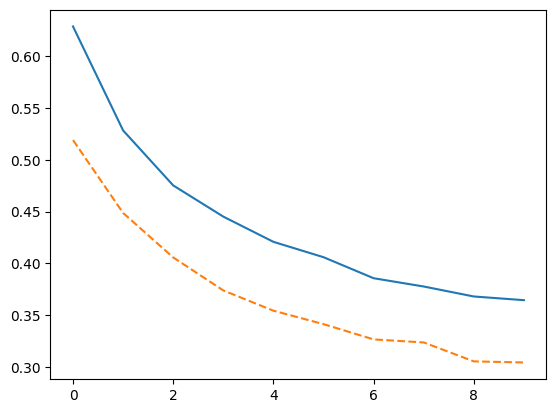

In [10]:
model = models.Sequential()
model.add(layers.Input((10_000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
execute_model(model)